In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("D:\\learning\\DA\\freecodecamp\\boilerplate-page-view-time-series-visualizer\\pageviews.csv")

In [6]:
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [7]:
#making first column as index
data_indexed=data.set_index("date")
data_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


Use the data to complete the following tasks:

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.


Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.


Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. 

The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [71]:
data_sorted = data_indexed.sort_values(by='value')
data_sorted

,value
date,
2016-05-09,1201
2016-05-11,1716
2016-05-10,2329
2016-05-16,2591
2016-05-15,2927
...,...
2019-11-15,314101
2019-08-06,337325
2019-08-07,341595


In [72]:
#quantile_025 = data_sorted["value"].quantile(0.025)
#quantile_975 = data_sorted["value"].quantile(0.975)
cleaned_data = data_sorted.loc[(data_sorted["value"] >= data_sorted["value"].quantile(0.025)) & 
                               (data_sorted["value"] <= data_sorted["value"].quantile(0.975))]
cleaned_data=cleaned_data.sort_index()

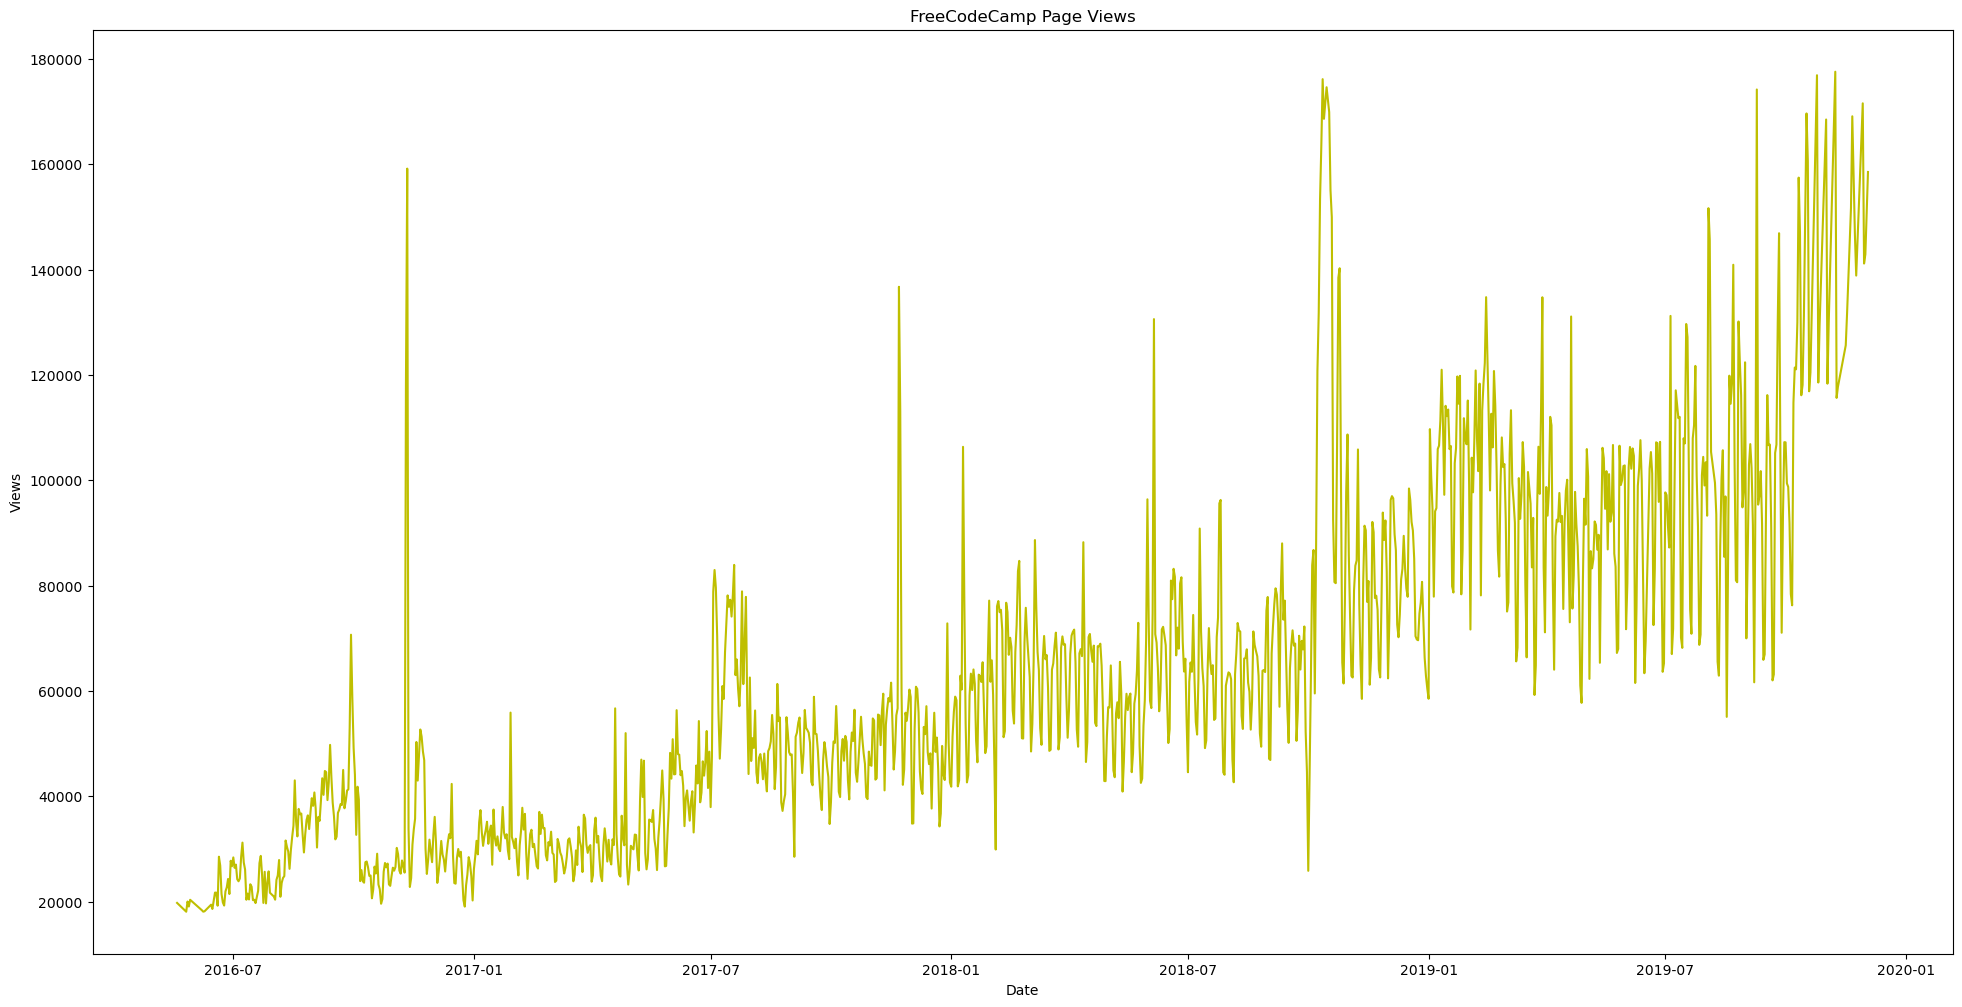

In [73]:

# Convert the 'Date' column to datetime, need to sort the index column befor plotting

plt.figure(figsize=(24, 12))
plt.plot(cleaned_data.index, cleaned_data['value'], color='y')
plt.title('FreeCodeCamp Page Views')
plt.xlabel('Date')
plt.ylabel('Views')


# Show the plot

plt.show()

In [12]:
df_bar = cleaned_data.copy()
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month

df_bar = df_bar.groupby(['year','month'])['value'].mean()
df_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [100]:
monthly_averages.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

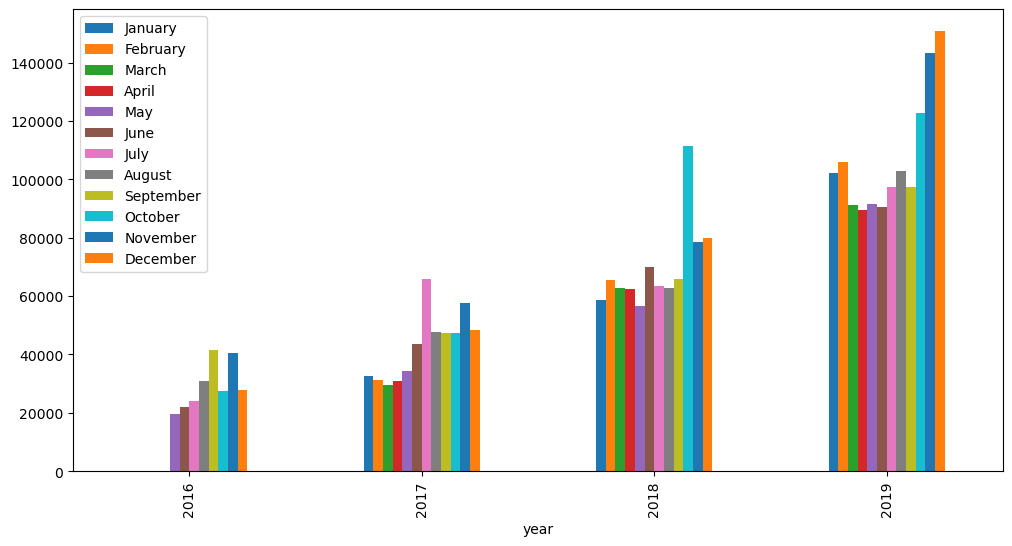

In [106]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}




monthly_averages = df_bar.unstack()
monthly_averages.columns = [month_names[month] for month in monthly_averages.columns]


ax = monthly_averages.plot(kind='bar', figsize=(12, 6))

In [125]:
df_year = cleaned_data.copy()
df_year['year'] = pd.DatetimeIndex(df_year.index).year
df_year['month'] = pd.DatetimeIndex(df_year.index).month
df_year


,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


Text(0.5, 1.0, 'Year wise Box Plot ')

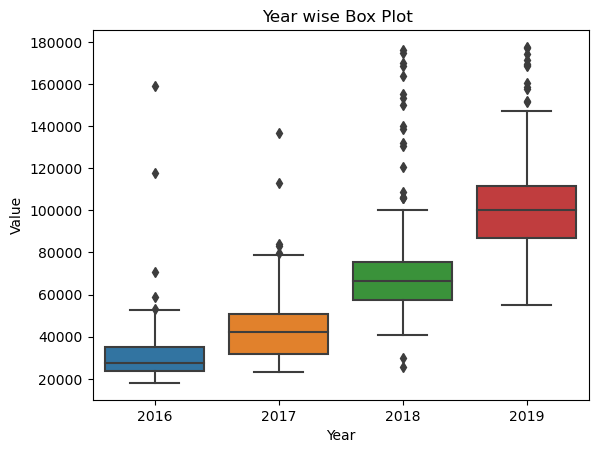

In [128]:
sns.boxplot(x="year", y="value", data=df_year)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Year wise Box Plot ")



Text(0.5, 1.0, 'month wise Box Plot ')

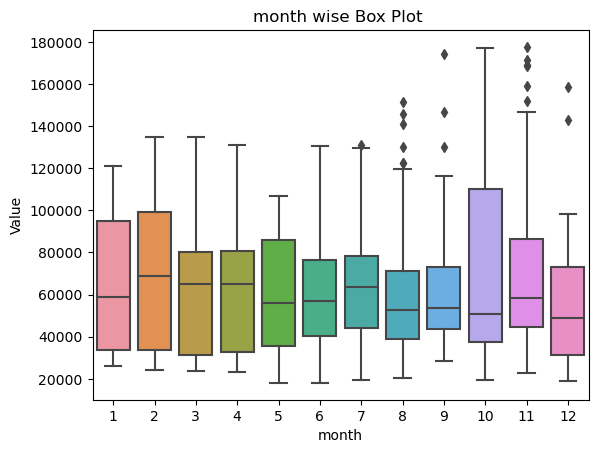

In [127]:
sns.boxplot(x="month", y="value", data=df_year)
plt.xlabel("month")
plt.ylabel("Value")
plt.title("month wise Box Plot ")